In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Jax-001 Replacing dataloader with jax

## Goals
1. Replace the pytorch moving mnist dataset with Jax Making the sequence on the fly

## Conditions
1. L=3
2. seq_len=256

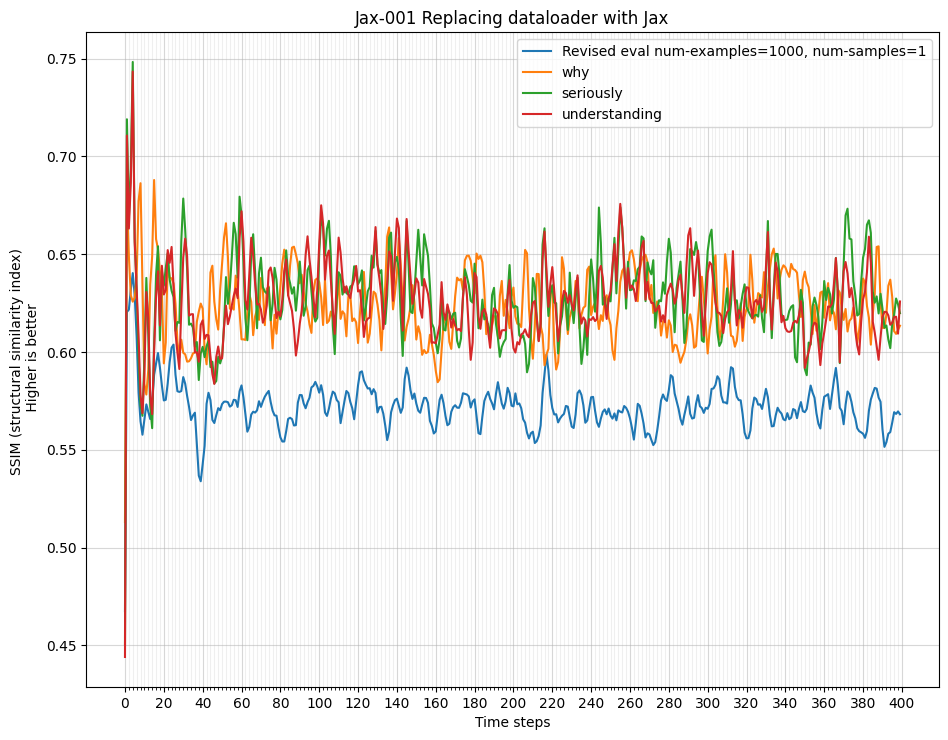

In [21]:
plot_title = "Jax-001 Replacing dataloader with Jax" 
x_limit = 400 

labels = []
labels.append('Revised eval num-examples=1000, num-samples=1')
labels.append('why')
labels.append('seriously')
labels.append('understanding')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_batch_10_examples_1000_20240326_193543/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_mistake_20240326_203738/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_seriously_20240326_202251/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_understanding_20240326_202510/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

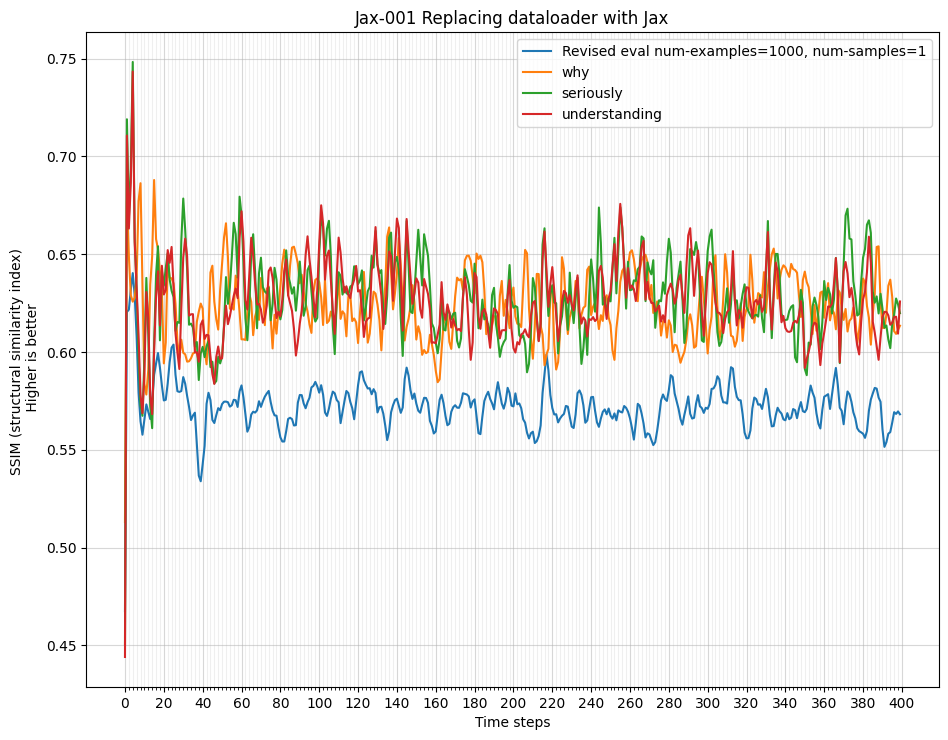

In [21]:
plot_title = "Jax-001 Replacing dataloader with Jax" 
x_limit = 400 

labels = []
labels.append('Revised eval num-examples=1000, num-samples=1')
labels.append('why')
labels.append('seriously')
labels.append('understanding')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_batch_10_examples_1000_20240326_193543/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_mistake_20240326_203738/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_seriously_20240326_202251/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_understanding_20240326_202510/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# Jax-002-rev3-1 Replacing dataloader with jax

## Goals
1. Fix the flutuation in the Jax-001
2. Suspecting the underfitting
       - Use only 20 of MNIST patch to build MMNIST dataset 

## Conditions
1. L=3
2. seq_len=256

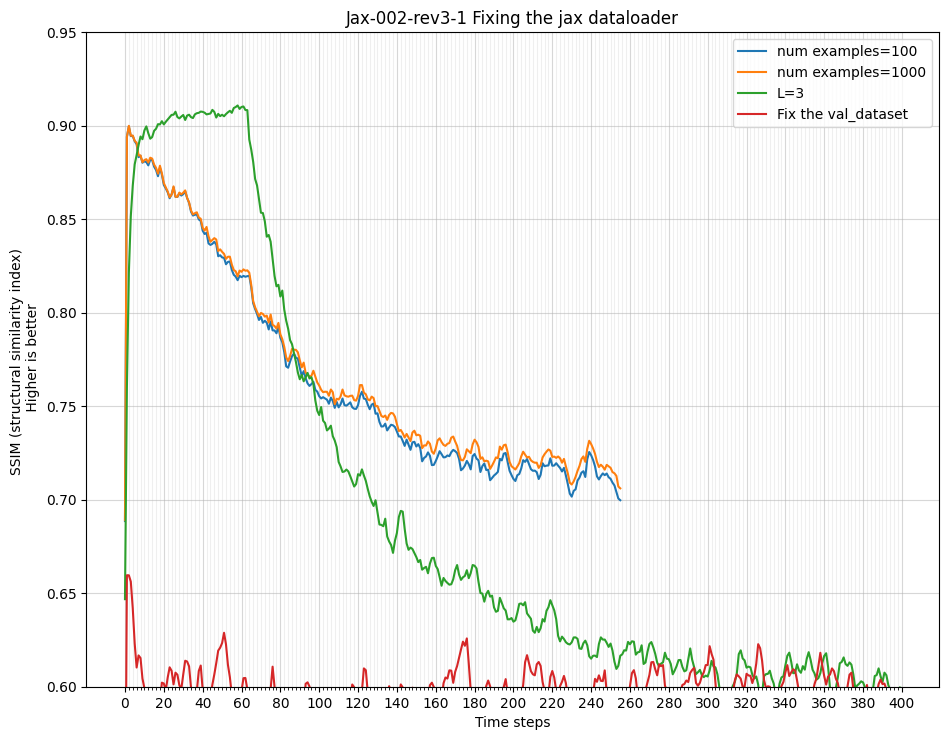

In [26]:
plot_title = "Jax-002-rev3-1 Fixing the jax dataloader" 
x_limit = 400 

labels = []
labels.append('num examples=100')
labels.append('num examples=1000')
labels.append('L=3')
labels.append('Fix the val_dataset')
# labels.append('bs=8, # examples=100, # samples=1')
# labels.append('bs=8, # examples=10, # samples=1')
# labels.append('bs=1, # examples=2, # samples=1')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev3_20240412_121934/eval_jax-002-rev3_20240415_125950/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev3_20240412_121934/eval_jax-002-rev3-1_20240415_131220/ssim_mean.npz')
paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_100_num_sample_1_20240328_170301/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev3_20240412_121934/eval_jax-002-rev3-3_20240415_135722/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_10_num_sample_1_20240328_170612/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_1_num_sample_1_20240328_170955/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.6,0.95)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')